In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_AMS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,09:45:00,16:45:00,1,2,1,1,0,220,209.09
1,09:45:00,10:40:00,1,2,1,1,1,110,209.09
2,09:45:00,21:35:00,1,2,1,1,0,220,245.09
3,09:45:00,09:40:00,1,2,1,1,1,440,1373.08
4,11:00:00,21:35:00,2,3,1,1,0,110,181.09


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
departure_time      1514 non-null object
arrival_time        1514 non-null object
days_before         1514 non-null int64
day_of_week         1514 non-null int64
num_of_luggage      1514 non-null int64
num_of_stops        1514 non-null int64
overnight_flight    1514 non-null int64
Class               1514 non-null int64
price               1514 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 106.6+ KB


In [7]:
df.shape

(1514, 9)

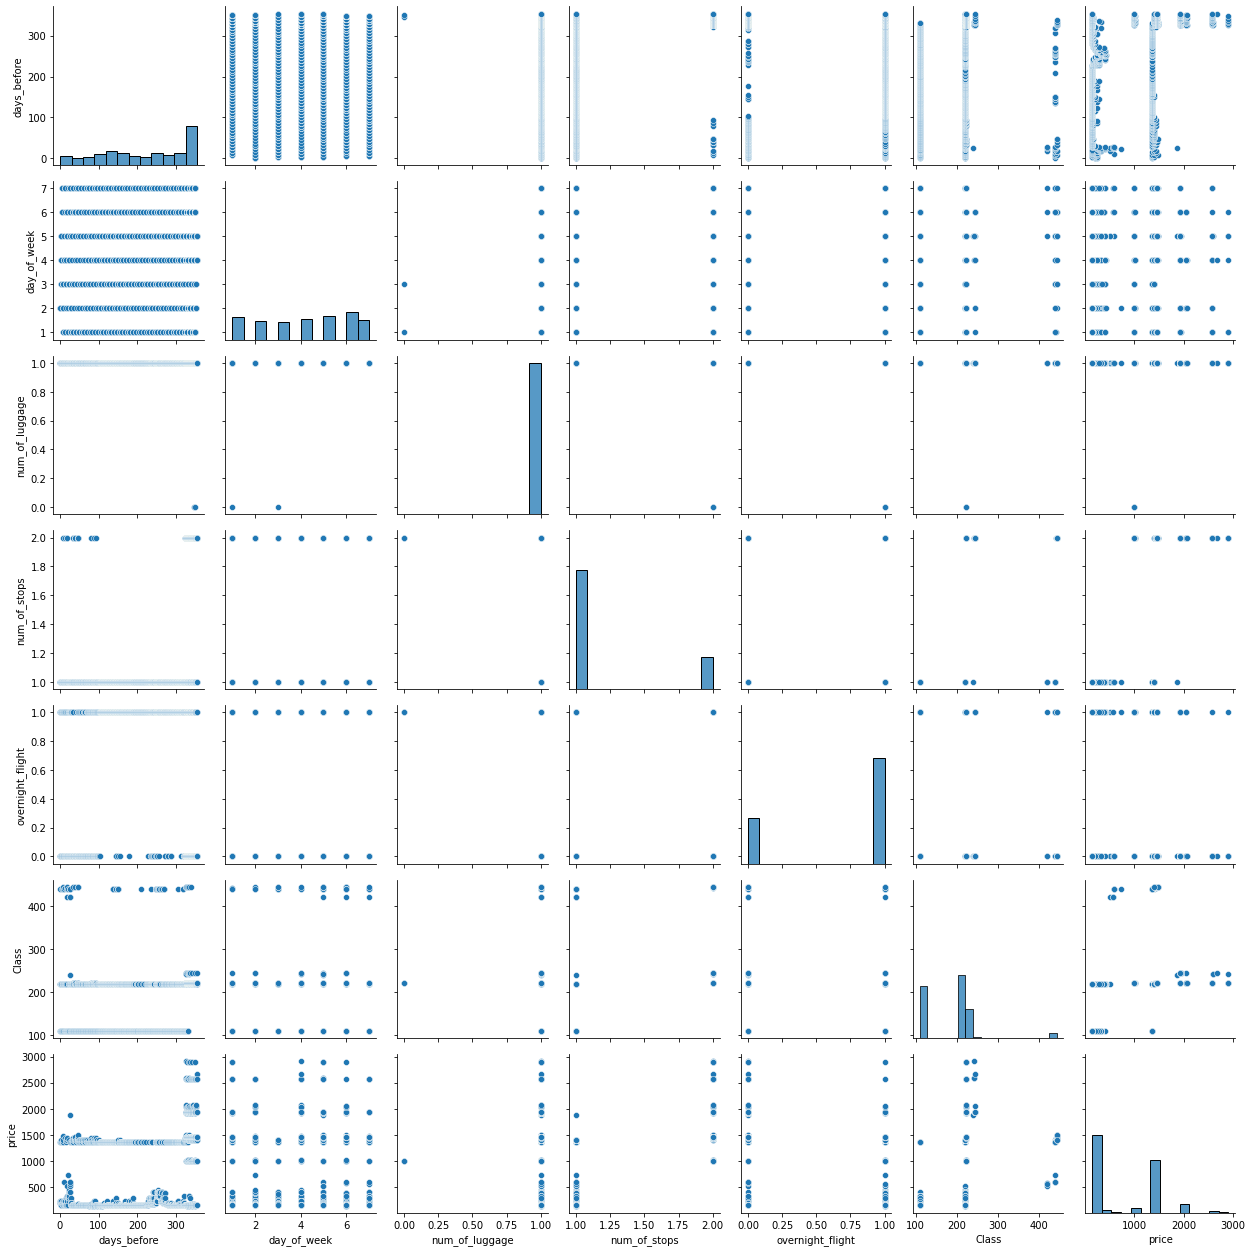

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 09:45:00,1900-01-01 16:45:00,1,2,1,1,0,220,209.09
1,1900-01-01 09:45:00,1900-01-01 10:40:00,1,2,1,1,1,110,209.09
2,1900-01-01 09:45:00,1900-01-01 21:35:00,1,2,1,1,0,220,245.09
3,1900-01-01 09:45:00,1900-01-01 09:40:00,1,2,1,1,1,440,1373.08
4,1900-01-01 11:00:00,1900-01-01 21:35:00,2,3,1,1,0,110,181.09


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 09:45:00,1900-01-01 16:45:00,1,2,1,1,0,220,209.09,-2208953700000000000,-2208928500000000000
1,1900-01-01 09:45:00,1900-01-01 10:40:00,1,2,1,1,1,110,209.09,-2208953700000000000,-2208950400000000000
2,1900-01-01 09:45:00,1900-01-01 21:35:00,1,2,1,1,0,220,245.09,-2208953700000000000,-2208911100000000000
3,1900-01-01 09:45:00,1900-01-01 09:40:00,1,2,1,1,1,440,1373.08,-2208953700000000000,-2208954000000000000
4,1900-01-01 11:00:00,1900-01-01 21:35:00,2,3,1,1,0,110,181.09,-2208949200000000000,-2208911100000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,2,1,1,1,0,220,209.09
1,2,1,1,1,1,110,209.09
2,2,1,1,1,0,220,245.09
3,2,1,1,1,1,440,1373.08
4,3,2,1,1,0,110,181.09


In [21]:
df.to_csv('skg_ams_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6443053185594109


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8249626520964326


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8300980569623484


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8304497771855128


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6335489971323306


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8304170065671088


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.2759538028225139


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5216300633101396


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 4s 8ms/step - loss: 392071.0938 - val_loss: 555847.3125
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 243723.0938 - val_loss: 786877.1250
Epoch 3/200
38/38 [==============================] - 0s 3ms/step - loss: 241218.5625 - val_loss: 721950.2500
Epoch 4/200
38/38 [==============================] - 0s 3ms/step - loss: 244189.1719 - val_loss: 687314.4375
Epoch 5/200
38/38 [==============================] - 0s 3ms/step - loss: 242007.7344 - val_loss: 894018.9375
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 240330.5469 - val_loss: 651016.2500
Epoch 7/200
38/38 [==============================] - 0s 3ms/step - loss: 240100.2500 - val_loss: 717965.9375
Epoch 8/200
38/38 [==============================] - 0s 3ms/step - loss: 237547.0469 - val_loss: 977619.6250
Epoch 9/200
38/38 [==============================] - 0s 3ms/step - loss: 237920.3906 - val_loss: 932309.7500
Epoch 10/200
38/38 

Epoch 149/200
38/38 [==============================] - 0s 5ms/step - loss: 132502.4219 - val_loss: 241297.9531
Epoch 150/200
38/38 [==============================] - 0s 5ms/step - loss: 139936.6094 - val_loss: 252927.5000
Epoch 151/200
38/38 [==============================] - 0s 4ms/step - loss: 133459.9844 - val_loss: 248326.7656
Epoch 152/200
38/38 [==============================] - 0s 4ms/step - loss: 139088.5625 - val_loss: 265729.4375
Epoch 153/200
38/38 [==============================] - 0s 4ms/step - loss: 138750.4062 - val_loss: 320786.7188
Epoch 154/200
38/38 [==============================] - 0s 4ms/step - loss: 140858.1875 - val_loss: 289001.3750
Epoch 155/200
38/38 [==============================] - 0s 4ms/step - loss: 134680.8750 - val_loss: 246806.8906
Epoch 156/200
38/38 [==============================] - 0s 4ms/step - loss: 133056.8125 - val_loss: 273072.5312
Epoch 157/200
38/38 [==============================] - 0s 4ms/step - loss: 133853.8281 - val_loss: 322705.0938
E

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.6963333878139599


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 1s 8ms/step - loss: 419393.7500 - val_loss: 842219.1875
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 253184.7344 - val_loss: 711661.4375
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 241621.7969 - val_loss: 824054.8125
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 250546.0000 - val_loss: 999086.8750
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 252342.3281 - val_loss: 821203.0625
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 239555.6406 - val_loss: 821803.8125
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 240542.3281 - val_loss: 856520.0000
Epoch 8/200
38/38 [==============================] - 0s 4ms/step - loss: 238346.5938 - val_loss: 646923.3750
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 238899.6406 - val_loss: 963580.6250
Epoch 10/200
38/38 

Epoch 149/200
38/38 [==============================] - 0s 4ms/step - loss: 169378.8906 - val_loss: 491349.0625
Epoch 150/200
38/38 [==============================] - 0s 4ms/step - loss: 168068.3750 - val_loss: 292805.8438
Epoch 151/200
38/38 [==============================] - 0s 4ms/step - loss: 164525.8750 - val_loss: 311869.0938
Epoch 152/200
38/38 [==============================] - 0s 4ms/step - loss: 164731.5938 - val_loss: 325263.5312
Epoch 153/200
38/38 [==============================] - 0s 4ms/step - loss: 165526.9688 - val_loss: 297397.2188
Epoch 154/200
38/38 [==============================] - 0s 4ms/step - loss: 165924.2344 - val_loss: 315760.8750
Epoch 155/200
38/38 [==============================] - 0s 4ms/step - loss: 165250.9375 - val_loss: 290598.3750
Epoch 156/200
38/38 [==============================] - 0s 5ms/step - loss: 161840.4375 - val_loss: 294284.8438
Epoch 157/200
38/38 [==============================] - 0s 5ms/step - loss: 172514.6250 - val_loss: 284525.7812
E

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.6461164234839307


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
38/38 [==============================] - 0s 6ms/step - loss: 466315.9062 - val_loss: 652911.6250
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 259935.6250 - val_loss: 965976.6250
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 245035.9688 - val_loss: 1089669.7500
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 242962.7031 - val_loss: 746851.3125
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 242216.5312 - val_loss: 706836.6250
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 241532.3281 - val_loss: 828035.0625
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 239439.4062 - val_loss: 711880.0000
Epoch 8/200
38/38 [==============================] - 0s 4ms/step - loss: 239992.1250 - val_loss: 739063.6250
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 238810.0469 - val_loss: 865454.0000
Epoch 10/200
38/38

38/38 [==============================] - 0s 4ms/step - loss: 175930.8594 - val_loss: 265135.9062
Epoch 76/200
38/38 [==============================] - 0s 4ms/step - loss: 175307.1719 - val_loss: 269880.9062
Epoch 77/200
38/38 [==============================] - 0s 4ms/step - loss: 177128.6250 - val_loss: 247388.9688
Epoch 78/200
38/38 [==============================] - 0s 4ms/step - loss: 173035.5156 - val_loss: 256059.8281
Epoch 79/200
38/38 [==============================] - 0s 4ms/step - loss: 171332.5156 - val_loss: 302665.5625
Epoch 80/200
38/38 [==============================] - 0s 4ms/step - loss: 180658.1719 - val_loss: 294122.3438
Epoch 81/200
38/38 [==============================] - 0s 4ms/step - loss: 172774.0000 - val_loss: 274943.3750
Epoch 82/200
38/38 [==============================] - 0s 4ms/step - loss: 172508.4062 - val_loss: 301917.0625
Epoch 83/200
38/38 [==============================] - 0s 4ms/step - loss: 167870.7656 - val_loss: 294685.6250
Epoch 84/200
38/38 [===

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
38/38 [==============================] - 1s 9ms/step - loss: 387034.4375 - val_loss: 870467.1250
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 253568.8906 - val_loss: 694709.6250
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 244839.7188 - val_loss: 749266.8750
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 248608.6094 - val_loss: 799644.0625
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 244207.9844 - val_loss: 741019.6875
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 239736.7031 - val_loss: 731335.2500
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 239749.9688 - val_loss: 835030.6250
Epoch 8/200
38/38 [==============================] - 0s 4ms/step - loss: 235721.2031 - val_loss: 636015.8125
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 232232.9531 - val_loss: 781341.6250
Epoch 10/200
38/38 

38/38 [==============================] - 0s 5ms/step - loss: 132393.6250 - val_loss: 260709.3906
Epoch 150/200
38/38 [==============================] - 0s 4ms/step - loss: 134449.3281 - val_loss: 230288.5469
Epoch 151/200
38/38 [==============================] - 0s 5ms/step - loss: 134218.8125 - val_loss: 299811.5312
Epoch 152/200
38/38 [==============================] - 0s 4ms/step - loss: 141386.3750 - val_loss: 247173.0938
Epoch 153/200
38/38 [==============================] - 0s 4ms/step - loss: 133176.7656 - val_loss: 243411.7969
Epoch 154/200
38/38 [==============================] - 0s 4ms/step - loss: 130711.1719 - val_loss: 257460.0625
Epoch 155/200
38/38 [==============================] - 0s 4ms/step - loss: 129065.1797 - val_loss: 260148.9375
Epoch 156/200
38/38 [==============================] - 0s 4ms/step - loss: 130821.9844 - val_loss: 376840.4062
Epoch 157/200
38/38 [==============================] - 0s 5ms/step - loss: 129549.8750 - val_loss: 287374.1875
Epoch 158/200
3

In [67]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
38/38 [==============================] - 1s 9ms/step - loss: 564815.5625 - val_loss: 480626.6875
Epoch 2/200
38/38 [==============================] - 0s 5ms/step - loss: 269054.0938 - val_loss: 660310.1250
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 239216.5469 - val_loss: 640307.5625
Epoch 4/200
38/38 [==============================] - 0s 5ms/step - loss: 247008.2969 - val_loss: 957873.7500
Epoch 5/200
38/38 [==============================] - 0s 5ms/step - loss: 241902.4219 - val_loss: 656354.6250
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 240441.6250 - val_loss: 803355.6250
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 241430.6719 - val_loss: 868278.1875
Epoch 8/200
38/38 [==============================] - 0s 4ms/step - loss: 241248.5000 - val_loss: 855166.1250
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 239011.8125 - val_loss: 678441.5625
Epoch 10/200
38/38 

38/38 [==============================] - 0s 4ms/step - loss: 169031.4219 - val_loss: 251327.3594
Epoch 150/200
38/38 [==============================] - 0s 4ms/step - loss: 167830.3906 - val_loss: 242690.9375
Epoch 151/200
38/38 [==============================] - 0s 5ms/step - loss: 163018.1406 - val_loss: 258695.0781
Epoch 152/200
38/38 [==============================] - 0s 5ms/step - loss: 166477.3594 - val_loss: 245232.8438
Epoch 153/200
38/38 [==============================] - 0s 5ms/step - loss: 163270.5938 - val_loss: 247320.6562
Epoch 154/200
38/38 [==============================] - 0s 4ms/step - loss: 162437.7500 - val_loss: 240457.8438
Epoch 155/200
38/38 [==============================] - 0s 4ms/step - loss: 164310.0000 - val_loss: 248531.1094
Epoch 156/200
38/38 [==============================] - 0s 4ms/step - loss: 162456.7344 - val_loss: 245812.2500
Epoch 157/200
38/38 [==============================] - 0s 4ms/step - loss: 161226.0781 - val_loss: 342698.2188
Epoch 158/200
3

In [68]:
mob1_sc = 0.61862
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
38/38 [==============================] - 1s 12ms/step - loss: 301764.4688 - val_loss: 784461.4375
Epoch 2/200
38/38 [==============================] - 0s 5ms/step - loss: 257974.2188 - val_loss: 994726.0000
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 251876.2812 - val_loss: 634638.6250
Epoch 4/200
38/38 [==============================] - 0s 5ms/step - loss: 255728.0938 - val_loss: 748415.3125
Epoch 5/200
38/38 [==============================] - 0s 5ms/step - loss: 245817.1875 - val_loss: 597556.5625
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 250390.9375 - val_loss: 1027177.6875
Epoch 7/200
38/38 [==============================] - 0s 5ms/step - loss: 244462.3438 - val_loss: 791395.5000
Epoch 8/200
38/38 [==============================] - 0s 5ms/step - loss: 244156.2188 - val_loss: 702528.3750
Epoch 9/200
38/38 [==============================] - 0s 5ms/step - loss: 251988.5312 - val_loss: 969759.5625
Epoch 10/200
38/3

38/38 [==============================] - 0s 5ms/step - loss: 127826.7344 - val_loss: 249950.8594
Epoch 150/200
38/38 [==============================] - 0s 5ms/step - loss: 125623.3047 - val_loss: 249838.4375
Epoch 151/200
38/38 [==============================] - 0s 5ms/step - loss: 122427.9141 - val_loss: 257941.4688
Epoch 152/200
38/38 [==============================] - 0s 5ms/step - loss: 125490.7344 - val_loss: 246849.7500
Epoch 153/200
38/38 [==============================] - 0s 5ms/step - loss: 120018.2578 - val_loss: 249051.4062
Epoch 154/200
38/38 [==============================] - 0s 5ms/step - loss: 124765.1484 - val_loss: 243972.9062
Epoch 155/200
38/38 [==============================] - 0s 5ms/step - loss: 127581.3281 - val_loss: 284347.5938
Epoch 156/200
38/38 [==============================] - 0s 5ms/step - loss: 127780.4141 - val_loss: 242333.6250
Epoch 157/200
38/38 [==============================] - 0s 5ms/step - loss: 131155.2812 - val_loss: 262621.8750
Epoch 158/200
3

In [69]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [70]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [71]:
result

,ML Model,R2-Score
0,AdaBoost,0.644
1,Bagging,0.825
2,Gradient Boosting,0.830
3,Decision Tree,0.830
4,Random Forest,0.633
5,Extra Tree,0.830
6,SVR,0.270
7,MLP,0.522
8,VGG11,0.696
9,VGG13,0.646


# Graph

In [72]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

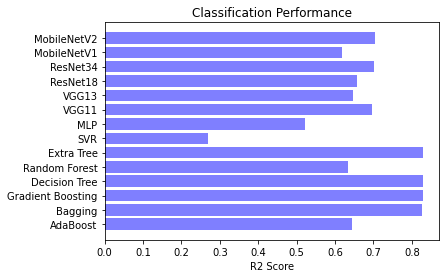

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()

In [74]:
from numba import cuda

cuda.select_device(0)
cuda.close()